# California Housing system

## Using K-Means and Supervised Models

In [191]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import joblib

**STEP 1: PROBLEM STATEMENT & DATA COLLECTION**

***1.1 PROBLEM STATEMENT***

**Goal-** to classify houses based on their geographic region and median income using the California Housing dataset. This project involves clustering houses into groups using unsupervised learning (K-Means) and then leveraging these clusters to train a supervised classification model.

***1.2 DATA COLLECTION***

In [192]:
housing_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [193]:
housing_df.to_csv("../data/raw/housing.csv", index=False)

In [194]:
# Obtaining Dataset dimensions:
print("Dataset dimensions:")
print(housing_df.shape)

Dataset dimensions:
(20640, 9)


**STEP 2: DATA CLEANING**

***2.1 ELIMINATE IRRELEVANT INFORMATION***

In [195]:
selected_columns = housing_df[['MedInc', 'Latitude', 'Longitude']]
selected_columns.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


**STEP 3: SPLIT TRAIN & TEST**

In [196]:
X_train, X_test = train_test_split(selected_columns, test_size=0.2, random_state=42)

In [197]:
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


## **MACHINE LEARNING**

**BUILDING A K-MEANS MODEL**

In [198]:
model_kmeans = KMeans(n_clusters=6, n_init= 'auto', random_state=42)

model_kmeans.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [199]:
y_train = list(model_kmeans.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


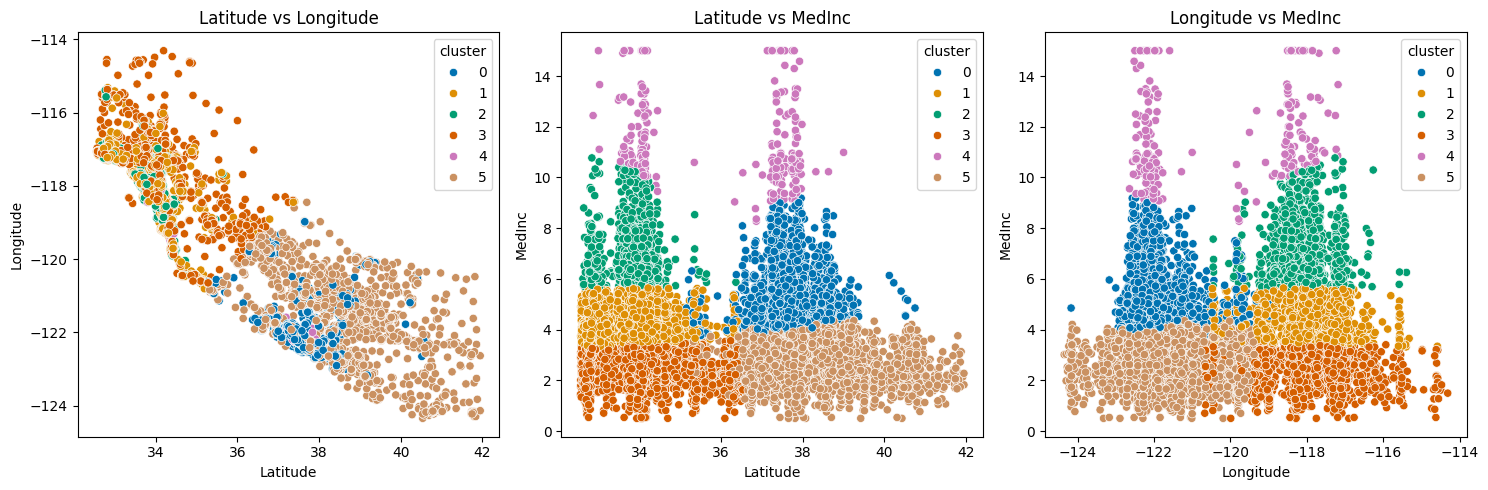

In [200]:
# plotting the clusters in a scatter plot

pairs = [
    ("Latitude", "Longitude"),
    ("Latitude", "MedInc"),
    ("Longitude", "MedInc")
]


fig, axis = plt.subplots(1, len(pairs), figsize=(15, 5))


for i, (x_var, y_var) in enumerate(pairs):
    sns.scatterplot(
        ax=axis[i], 
        data=X_train, 
        x=x_var, 
        y=y_var, 
        hue="cluster", 
        palette="colorblind"
    )
    axis[i].set_title(f"{x_var} vs {y_var}")

plt.tight_layout()
plt.show()


In [201]:
''' After training the K-Means model, I will predict the clusters 
 in the test set and add the predictions to the data. '''

y_test = list(model_kmeans.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


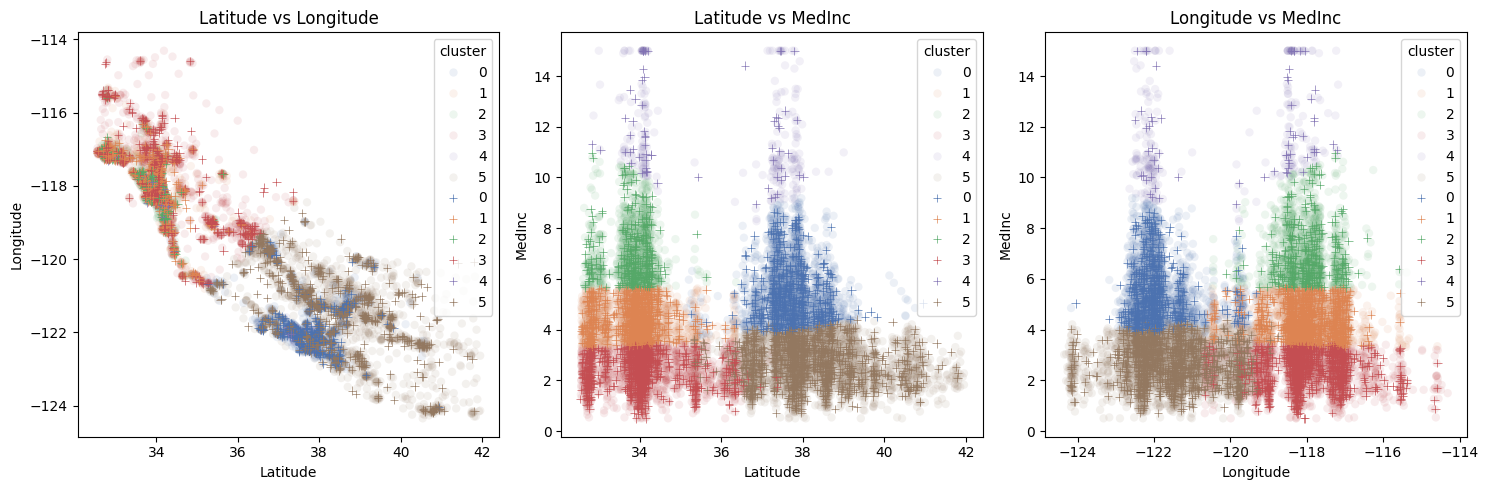

In [202]:
fig, axis = plt.subplots(1, len(pairs), figsize=(15, 5))


for i, (x_var, y_var) in enumerate(pairs):
    # Train data
    sns.scatterplot(
        ax=axis[i], 
        data=X_train, 
        x=x_var, 
        y=y_var, 
        hue="cluster", 
        palette="deep", 
        alpha=0.1
    )
    # Test data
    sns.scatterplot(
        ax=axis[i], 
        data=X_test, 
        x=x_var, 
        y=y_var, 
        hue="cluster", 
        palette="deep", 
        marker="+"
    )
    
    axis[i].set_title(f"{x_var} vs {y_var}")


plt.tight_layout()
plt.show()


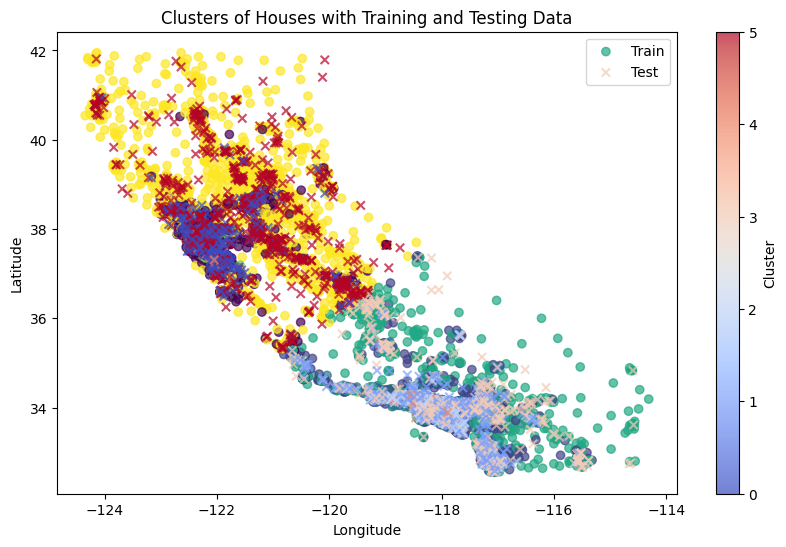

In [203]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis', alpha=0.7, label='Train')
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['cluster'], cmap='coolwarm', alpha=0.7, marker='x', label='Test')
plt.colorbar(label='Cluster')
plt.title('Clusters of Houses with Training and Testing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## Training a supervised classification model

### using RANDOM FOREST

In [204]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [205]:
y_pred_rf = rf_model.predict(X_test)

In [206]:
print("Classification Report:")
print(classification_report(X_test['cluster'], y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       983
           2       1.00      1.00      1.00       299
           3       1.00      1.00      1.00      1111
           4       1.00      1.00      1.00        62
           5       1.00      1.00      1.00      1112

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128

Accuracy: 1.0


### using DECISION TREE

As it is a simple and interpretable model, I also opted for the DecisionTree model, which allows me to clearly visualize the rules used to classify the clusters.

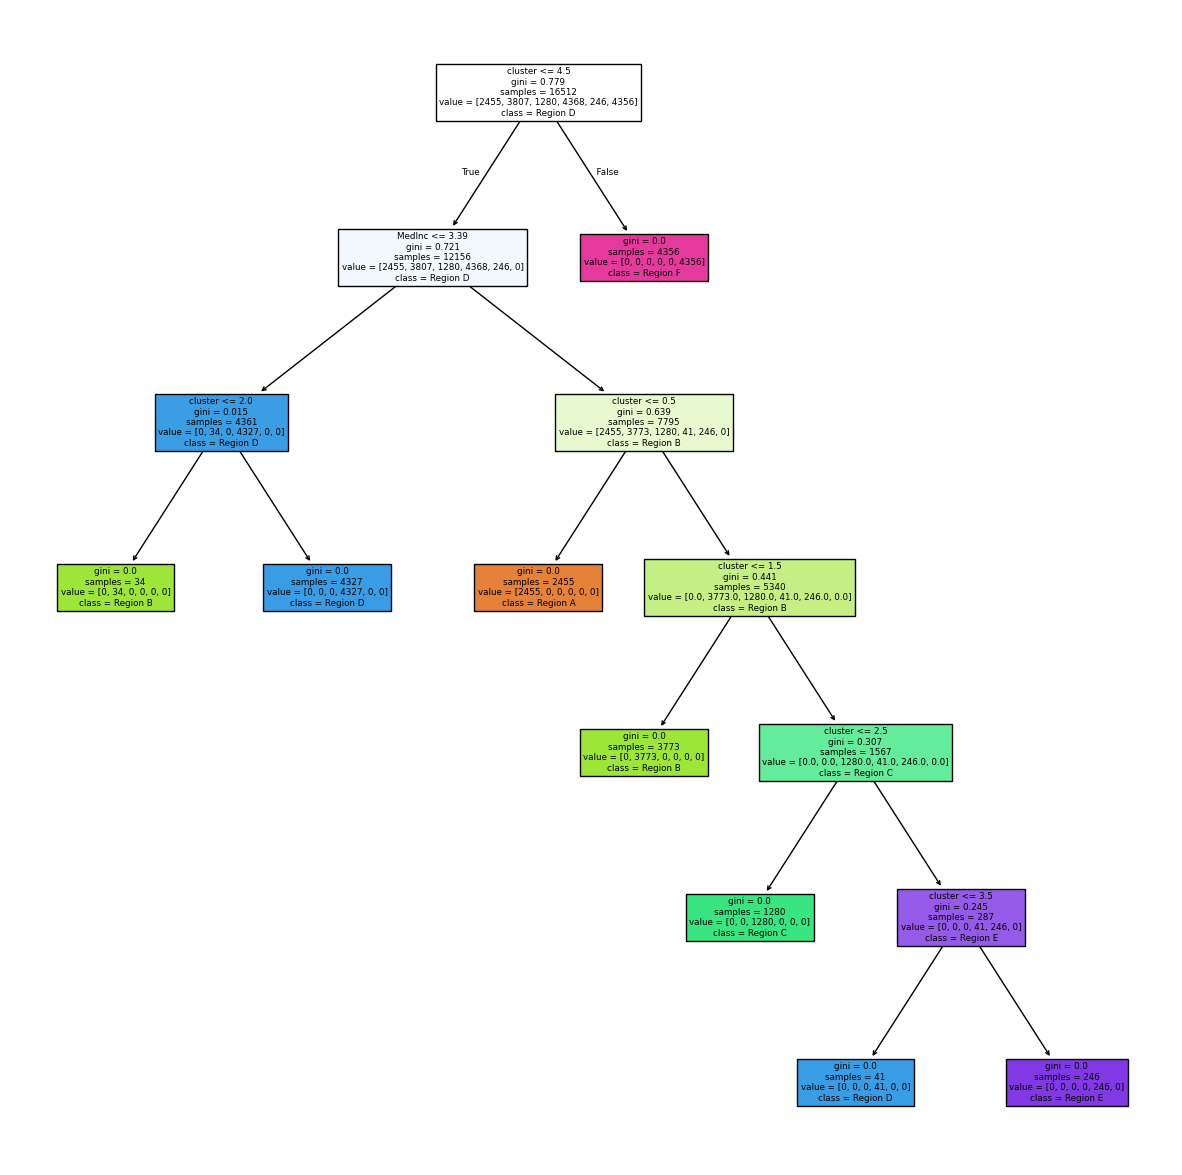

In [207]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)


fig = plt.figure(figsize=(15,15))
tree.plot_tree(dt_model, feature_names = list(X_train.columns), class_names = ["Region A", "Region B", "Region C", "Region D", "Region E", "Region F"], filled = True)

plt.show()

In [208]:
y_pred_dt = dt_model.predict(X_test)

In [209]:
print("Classification Report:")
print(classification_report(X_test['cluster'], y_pred_dt))

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       983
           2       1.00      1.00      1.00       299
           3       1.00      1.00      1.00      1111
           4       1.00      1.00      1.00        62
           5       1.00      1.00      1.00      1112

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128

Accuracy: 1.0


## SAVING MODELS

I chose to use **joblib** due to its efficiency in **handling large data** structures, such as those generated by the models trained in the project with a dataset of dimensions (**20640, 3**). Because it is optimized for NumPy arrays and recommended by scikit-learn, **joblib offers greater speed and efficiency** compared to pickle, making it ideal for this case.

In [210]:
# unsupervised model
joblib.dump(model_kmeans, 'kmeans_model_42.joblib')

['kmeans_model_42.joblib']

In [211]:
# supervised model - RANDOM FOREST
joblib.dump(rf_model, 'random_forest_model_42.joblib')

['random_forest_model_42.joblib']

In [212]:
# supervised model - DECISION TREE
joblib.dump(dt_model, 'decision_tree_model_42.joblib')

['decision_tree_model_42.joblib']